In [1]:
from ase_interface import ANIENS,ensemblemolecule
import hdnntools as hdt

van Der Waals correction will be unavailable. Please install ased3


In [2]:
import theano
import sys
sys.path.append('/scratch/Gits/')
import HIPNN as hipnn

In [3]:
import numpy as np
import time
# ASE
import  ase
from ase.io import read, write
from ase.optimize import BFGS, LBFGS 
from ase.vibrations import Vibrations
from ase.vibrations import Infrared
from ase.thermochemistry import IdealGasThermo

import os

#figure plotting
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [4]:
molecule = '/nh/nest/u/jsmith/scratch/Research/dipole_molecules/1L2Y_prepped.xyz'
mol = read(molecule)

In [5]:
ntdir = '/nh/nest/u/jsmith/scratch/Gits/ANI-Networks/networks/ANI-1x/ANI-9.0.4_netarch8/'
cns = ntdir + 'rHCNO-4.6A_16-3.1A_a4-8.params'
sae = ntdir + 'sae_6-31gd.dat'
nnf = ntdir + 'train'
Nn = 5

In [6]:
# Set NC
aens = ensemblemolecule(cns, sae, nnf, Nn, 0)

# Set ANI calculator
mol.set_calculator(ANIENS(aens,sdmx=20000000.0))

In [7]:
hippydir = '/nh/nest/u/jsmith/scratch/Research/harmonic_ir/hipmodels/AL-trained_models_patience-50_num-20/'
hippies = os.listdir(hippydir)
Nh = 4

hipnn.database.dipole_features["dipole"]="Chg"
hippymodels = [hipnn.Model.from_file(hippydir+hippy.rsplit(".",1)[0]) for hippy in hippies]
for hippy in hippymodels:
    hippy.compile()
    
mol.calc.set_hipnn_dipole_model(hippymodels)

MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!


In [8]:
#print(model.net_params["targets"])

In [9]:
mol.get_dipole_moment()

-6.062048

In [10]:
e = mol.get_potential_energy()
print('Total energy', e, 'eV')

Total energy -208300.6182174671 eV


In [11]:
start_time = time.time()
dyn = LBFGS(mol)
dyn.run(fmax=0.0001)
print('[ANI Total time:', time.time() - start_time, 'seconds]')

       Step     Time          Energy         fmax
LBFGS:    0 17:28:36  -208300.618217        0.0001
[ANI Total time: 0.5124444961547852 seconds]


In [12]:
hdt.writexyzfile(molecule.rsplit(".",1)[0]+'_opt.xyz',[mol.get_positions()],mol.get_chemical_symbols())

In [13]:
IR = Infrared(mol, delta=0.001) 
IR.run()

Writing ir-d0.001.eq.pckl, dipole moment = (-6.062048 10.208364 5.678257)
Writing ir-d0.001.0x-.pckl, dipole moment = (-6.061957 10.208177 5.678262)
Writing ir-d0.001.0x+.pckl, dipole moment = (-6.062138 10.208549 5.678251)
Writing ir-d0.001.0y-.pckl, dipole moment = (-6.061787 10.208566 5.678323)
Writing ir-d0.001.0y+.pckl, dipole moment = (-6.062303 10.208158 5.678191)
Writing ir-d0.001.0z-.pckl, dipole moment = (-6.061542 10.208065 5.678294)
Writing ir-d0.001.0z+.pckl, dipole moment = (-6.062551 10.208659 5.678219)
Writing ir-d0.001.1x-.pckl, dipole moment = (-6.062851 10.208741 5.677710)
Writing ir-d0.001.1x+.pckl, dipole moment = (-6.061239 10.207983 5.678804)
Writing ir-d0.001.1y-.pckl, dipole moment = (-6.061980 10.207161 5.678290)
Writing ir-d0.001.1y+.pckl, dipole moment = (-6.062098 10.209558 5.678226)
Writing ir-d0.001.1z-.pckl, dipole moment = (-6.062931 10.208729 5.676884)
Writing ir-d0.001.1z+.pckl, dipole moment = (-6.061150 10.207991 5.679630)
Writing ir-d0.001.2x-.pckl

Writing ir-d0.001.18x-.pckl, dipole moment = (-6.062459 10.208321 5.678215)
Writing ir-d0.001.18x+.pckl, dipole moment = (-6.061636 10.208406 5.678298)
Writing ir-d0.001.18y-.pckl, dipole moment = (-6.062223 10.208053 5.678227)
Writing ir-d0.001.18y+.pckl, dipole moment = (-6.061873 10.208674 5.678285)
Writing ir-d0.001.18z-.pckl, dipole moment = (-6.062158 10.208456 5.678015)
Writing ir-d0.001.18z+.pckl, dipole moment = (-6.061940 10.208271 5.678499)
Writing ir-d0.001.19x-.pckl, dipole moment = (-6.062410 10.208364 5.678227)
Writing ir-d0.001.19x+.pckl, dipole moment = (-6.061688 10.208363 5.678286)
Writing ir-d0.001.19y-.pckl, dipole moment = (-6.062201 10.208064 5.678223)
Writing ir-d0.001.19y+.pckl, dipole moment = (-6.061895 10.208662 5.678289)
Writing ir-d0.001.19z-.pckl, dipole moment = (-6.061872 10.208280 5.678090)
Writing ir-d0.001.19z+.pckl, dipole moment = (-6.062227 10.208448 5.678422)
Writing ir-d0.001.20x-.pckl, dipole moment = (-6.061696 10.209229 5.678266)
Writing ir-d

Writing ir-d0.001.36x-.pckl, dipole moment = (-6.062036 10.208346 5.678165)
Writing ir-d0.001.36x+.pckl, dipole moment = (-6.062061 10.208380 5.678349)
Writing ir-d0.001.36y-.pckl, dipole moment = (-6.062090 10.208387 5.678213)
Writing ir-d0.001.36y+.pckl, dipole moment = (-6.062006 10.208339 5.678300)
Writing ir-d0.001.36z-.pckl, dipole moment = (-6.062048 10.208200 5.678373)
Writing ir-d0.001.36z+.pckl, dipole moment = (-6.062048 10.208525 5.678141)
Writing ir-d0.001.37x-.pckl, dipole moment = (-6.061904 10.208352 5.678345)
Writing ir-d0.001.37x+.pckl, dipole moment = (-6.062192 10.208374 5.678168)
Writing ir-d0.001.37y-.pckl, dipole moment = (-6.062014 10.208351 5.678247)
Writing ir-d0.001.37y+.pckl, dipole moment = (-6.062082 10.208376 5.678266)
Writing ir-d0.001.37z-.pckl, dipole moment = (-6.061981 10.208347 5.678233)
Writing ir-d0.001.37z+.pckl, dipole moment = (-6.062116 10.208380 5.678281)
Writing ir-d0.001.38x-.pckl, dipole moment = (-6.062076 10.208282 5.678299)
Writing ir-d

Writing ir-d0.001.54x-.pckl, dipole moment = (-6.061966 10.208353 5.678227)
Writing ir-d0.001.54x+.pckl, dipole moment = (-6.062126 10.208370 5.678284)
Writing ir-d0.001.54y-.pckl, dipole moment = (-6.062016 10.208366 5.678287)
Writing ir-d0.001.54y+.pckl, dipole moment = (-6.062079 10.208359 5.678225)
Writing ir-d0.001.54z-.pckl, dipole moment = (-6.061960 10.208340 5.678239)
Writing ir-d0.001.54z+.pckl, dipole moment = (-6.062135 10.208386 5.678273)
Writing ir-d0.001.55x-.pckl, dipole moment = (-6.061872 10.208466 5.678110)
Writing ir-d0.001.55x+.pckl, dipole moment = (-6.062226 10.208264 5.678407)
Writing ir-d0.001.55y-.pckl, dipole moment = (-6.061922 10.208467 5.678262)
Writing ir-d0.001.55y+.pckl, dipole moment = (-6.062175 10.208261 5.678253)
Writing ir-d0.001.55z-.pckl, dipole moment = (-6.062016 10.208288 5.678069)
Writing ir-d0.001.55z+.pckl, dipole moment = (-6.062079 10.208438 5.678443)
Writing ir-d0.001.56x-.pckl, dipole moment = (-6.061987 10.207871 5.677785)
Writing ir-d

Writing ir-d0.001.72x-.pckl, dipole moment = (-6.061875 10.208402 5.678167)
Writing ir-d0.001.72x+.pckl, dipole moment = (-6.062218 10.208325 5.678344)
Writing ir-d0.001.72y-.pckl, dipole moment = (-6.062150 10.208291 5.678304)
Writing ir-d0.001.72y+.pckl, dipole moment = (-6.061946 10.208436 5.678209)
Writing ir-d0.001.72z-.pckl, dipole moment = (-6.062036 10.208367 5.678173)
Writing ir-d0.001.72z+.pckl, dipole moment = (-6.062061 10.208361 5.678340)
Writing ir-d0.001.73x-.pckl, dipole moment = (-6.061958 10.208367 5.678189)
Writing ir-d0.001.73x+.pckl, dipole moment = (-6.062136 10.208360 5.678323)
Writing ir-d0.001.73y-.pckl, dipole moment = (-6.062025 10.208451 5.678277)
Writing ir-d0.001.73y+.pckl, dipole moment = (-6.062068 10.208278 5.678236)
Writing ir-d0.001.73z-.pckl, dipole moment = (-6.062043 10.208465 5.678239)
Writing ir-d0.001.73z+.pckl, dipole moment = (-6.062047 10.208264 5.678273)
Writing ir-d0.001.74x-.pckl, dipole moment = (-6.062027 10.208322 5.678336)
Writing ir-d

Writing ir-d0.001.90x-.pckl, dipole moment = (-6.061822 10.208430 5.678358)
Writing ir-d0.001.90x+.pckl, dipole moment = (-6.062269 10.208297 5.678160)
Writing ir-d0.001.90y-.pckl, dipole moment = (-6.062232 10.208233 5.678063)
Writing ir-d0.001.90y+.pckl, dipole moment = (-6.061863 10.208493 5.678451)
Writing ir-d0.001.90z-.pckl, dipole moment = (-6.062180 10.208277 5.678151)
Writing ir-d0.001.90z+.pckl, dipole moment = (-6.061916 10.208451 5.678362)
Writing ir-d0.001.91x-.pckl, dipole moment = (-6.061968 10.208353 5.678278)
Writing ir-d0.001.91x+.pckl, dipole moment = (-6.062126 10.208373 5.678238)
Writing ir-d0.001.91y-.pckl, dipole moment = (-6.062219 10.208334 5.678093)
Writing ir-d0.001.91y+.pckl, dipole moment = (-6.061873 10.208391 5.678423)
Writing ir-d0.001.91z-.pckl, dipole moment = (-6.062168 10.208430 5.678193)
Writing ir-d0.001.91z+.pckl, dipole moment = (-6.061927 10.208296 5.678322)
Writing ir-d0.001.92x-.pckl, dipole moment = (-6.062129 10.208330 5.678231)
Writing ir-d

Writing ir-d0.001.108x-.pckl, dipole moment = (-6.062510 10.208529 5.678658)
Writing ir-d0.001.108x+.pckl, dipole moment = (-6.061597 10.208191 5.677830)
Writing ir-d0.001.108y-.pckl, dipole moment = (-6.061754 10.208118 5.677911)
Writing ir-d0.001.108y+.pckl, dipole moment = (-6.062347 10.208609 5.678598)
Writing ir-d0.001.108z-.pckl, dipole moment = (-6.059915 10.208124 5.679491)
Writing ir-d0.001.108z+.pckl, dipole moment = (-6.064179 10.208598 5.677011)
Writing ir-d0.001.109x-.pckl, dipole moment = (-6.062086 10.208412 5.678485)
Writing ir-d0.001.109x+.pckl, dipole moment = (-6.062014 10.208310 5.678012)
Writing ir-d0.001.109y-.pckl, dipole moment = (-6.061666 10.208619 5.678489)
Writing ir-d0.001.109y+.pckl, dipole moment = (-6.062432 10.208107 5.678022)
Writing ir-d0.001.109z-.pckl, dipole moment = (-6.061201 10.208243 5.679476)
Writing ir-d0.001.109z+.pckl, dipole moment = (-6.062894 10.208481 5.677032)
Writing ir-d0.001.110x-.pckl, dipole moment = (-6.062027 10.208326 5.678196)

Writing ir-d0.001.125z+.pckl, dipole moment = (-6.061586 10.208829 5.677654)
Writing ir-d0.001.126x-.pckl, dipole moment = (-6.062180 10.208160 5.678249)
Writing ir-d0.001.126x+.pckl, dipole moment = (-6.061910 10.208568 5.678252)
Writing ir-d0.001.126y-.pckl, dipole moment = (-6.061992 10.208260 5.678315)
Writing ir-d0.001.126y+.pckl, dipole moment = (-6.062103 10.208467 5.678195)
Writing ir-d0.001.126z-.pckl, dipole moment = (-6.061470 10.208615 5.677968)
Writing ir-d0.001.126z+.pckl, dipole moment = (-6.062624 10.208112 5.678541)
Writing ir-d0.001.127x-.pckl, dipole moment = (-6.061740 10.208483 5.678408)
Writing ir-d0.001.127x+.pckl, dipole moment = (-6.062352 10.208247 5.678090)
Writing ir-d0.001.127y-.pckl, dipole moment = (-6.061946 10.208101 5.678373)
Writing ir-d0.001.127y+.pckl, dipole moment = (-6.062153 10.208624 5.678140)
Writing ir-d0.001.127z-.pckl, dipole moment = (-6.061841 10.208909 5.677894)
Writing ir-d0.001.127z+.pckl, dipole moment = (-6.062255 10.207817 5.678615)

Writing ir-d0.001.143z-.pckl, dipole moment = (-6.061509 10.209152 5.678646)
Writing ir-d0.001.143z+.pckl, dipole moment = (-6.062587 10.207576 5.677868)
Writing ir-d0.001.144x-.pckl, dipole moment = (-6.062240 10.208167 5.678195)
Writing ir-d0.001.144x+.pckl, dipole moment = (-6.061860 10.208556 5.678317)
Writing ir-d0.001.144y-.pckl, dipole moment = (-6.061191 10.209402 5.678698)
Writing ir-d0.001.144y+.pckl, dipole moment = (-6.062908 10.207322 5.677815)
Writing ir-d0.001.144z-.pckl, dipole moment = (-6.062143 10.208246 5.678287)
Writing ir-d0.001.144z+.pckl, dipole moment = (-6.061951 10.208485 5.678227)
Writing ir-d0.001.145x-.pckl, dipole moment = (-6.062026 10.208299 5.678281)
Writing ir-d0.001.145x+.pckl, dipole moment = (-6.062073 10.208426 5.678230)
Writing ir-d0.001.145y-.pckl, dipole moment = (-6.062762 10.207434 5.677654)
Writing ir-d0.001.145y+.pckl, dipole moment = (-6.061335 10.209294 5.678858)
Writing ir-d0.001.145z-.pckl, dipole moment = (-6.062096 10.208280 5.678365)

Writing ir-d0.001.161y+.pckl, dipole moment = (-6.061973 10.208449 5.678328)
Writing ir-d0.001.161z-.pckl, dipole moment = (-6.061639 10.207084 5.677507)
Writing ir-d0.001.161z+.pckl, dipole moment = (-6.062459 10.209653 5.679010)
Writing ir-d0.001.162x-.pckl, dipole moment = (-6.063679 10.209502 5.678563)
Writing ir-d0.001.162x+.pckl, dipole moment = (-6.060417 10.207246 5.677953)
Writing ir-d0.001.162y-.pckl, dipole moment = (-6.061857 10.208468 5.678370)
Writing ir-d0.001.162y+.pckl, dipole moment = (-6.062242 10.208267 5.678144)
Writing ir-d0.001.162z-.pckl, dipole moment = (-6.062711 10.210900 5.676610)
Writing ir-d0.001.162z+.pckl, dipole moment = (-6.061389 10.205849 5.679910)
Writing ir-d0.001.163x-.pckl, dipole moment = (-6.060389 10.207905 5.677756)
Writing ir-d0.001.163x+.pckl, dipole moment = (-6.063712 10.208844 5.678761)
Writing ir-d0.001.163y-.pckl, dipole moment = (-6.062385 10.208923 5.678276)
Writing ir-d0.001.163y+.pckl, dipole moment = (-6.061713 10.207809 5.678238)

Writing ir-d0.001.179y-.pckl, dipole moment = (-6.062168 10.208419 5.678263)
Writing ir-d0.001.179y+.pckl, dipole moment = (-6.061929 10.208310 5.678249)
Writing ir-d0.001.179z-.pckl, dipole moment = (-6.062221 10.208541 5.678184)
Writing ir-d0.001.179z+.pckl, dipole moment = (-6.061878 10.208190 5.678329)
Writing ir-d0.001.180x-.pckl, dipole moment = (-6.061206 10.208218 5.678456)
Writing ir-d0.001.180x+.pckl, dipole moment = (-6.062893 10.208518 5.678053)
Writing ir-d0.001.180y-.pckl, dipole moment = (-6.062738 10.209669 5.677636)
Writing ir-d0.001.180y+.pckl, dipole moment = (-6.061362 10.207067 5.678871)
Writing ir-d0.001.180z-.pckl, dipole moment = (-6.061654 10.207620 5.678977)
Writing ir-d0.001.180z+.pckl, dipole moment = (-6.062447 10.209109 5.677533)
Writing ir-d0.001.181x-.pckl, dipole moment = (-6.061851 10.208279 5.678653)
Writing ir-d0.001.181x+.pckl, dipole moment = (-6.062261 10.208457 5.677850)
Writing ir-d0.001.181y-.pckl, dipole moment = (-6.061519 10.207165 5.678437)

Writing ir-d0.001.197x+.pckl, dipole moment = (-6.062022 10.208380 5.678263)
Writing ir-d0.001.197y-.pckl, dipole moment = (-6.062021 10.208323 5.678249)
Writing ir-d0.001.197y+.pckl, dipole moment = (-6.062076 10.208405 5.678264)
Writing ir-d0.001.197z-.pckl, dipole moment = (-6.062035 10.208319 5.678398)
Writing ir-d0.001.197z+.pckl, dipole moment = (-6.062064 10.208409 5.678112)
Writing ir-d0.001.198x-.pckl, dipole moment = (-6.062060 10.208355 5.678227)
Writing ir-d0.001.198x+.pckl, dipole moment = (-6.062037 10.208372 5.678286)
Writing ir-d0.001.198y-.pckl, dipole moment = (-6.062072 10.208488 5.678293)
Writing ir-d0.001.198y+.pckl, dipole moment = (-6.062027 10.208239 5.678216)
Writing ir-d0.001.198z-.pckl, dipole moment = (-6.062176 10.208346 5.678085)
Writing ir-d0.001.198z+.pckl, dipole moment = (-6.061921 10.208381 5.678428)
Writing ir-d0.001.199x-.pckl, dipole moment = (-6.062060 10.208429 5.678217)
Writing ir-d0.001.199x+.pckl, dipole moment = (-6.062037 10.208298 5.678295)

Writing ir-d0.001.215x-.pckl, dipole moment = (-6.061485 10.208329 5.678199)
Writing ir-d0.001.215x+.pckl, dipole moment = (-6.062613 10.208399 5.678315)
Writing ir-d0.001.215y-.pckl, dipole moment = (-6.061973 10.208775 5.678025)
Writing ir-d0.001.215y+.pckl, dipole moment = (-6.062124 10.207952 5.678489)
Writing ir-d0.001.215z-.pckl, dipole moment = (-6.060843 10.207496 5.679261)
Writing ir-d0.001.215z+.pckl, dipole moment = (-6.063254 10.209232 5.677250)
Writing ir-d0.001.216x-.pckl, dipole moment = (-6.061077 10.207294 5.677677)
Writing ir-d0.001.216x+.pckl, dipole moment = (-6.063019 10.209431 5.678838)
Writing ir-d0.001.216y-.pckl, dipole moment = (-6.062870 10.208817 5.678277)
Writing ir-d0.001.216y+.pckl, dipole moment = (-6.061223 10.207907 5.678235)
Writing ir-d0.001.216z-.pckl, dipole moment = (-6.063376 10.209403 5.677929)
Writing ir-d0.001.216z+.pckl, dipole moment = (-6.060709 10.207314 5.678583)
Writing ir-d0.001.217x-.pckl, dipole moment = (-6.062101 10.209316 5.678811)

Writing ir-d0.001.232z+.pckl, dipole moment = (-6.059827 10.208002 5.678411)
Writing ir-d0.001.233x-.pckl, dipole moment = (-6.061922 10.208823 5.677979)
Writing ir-d0.001.233x+.pckl, dipole moment = (-6.062176 10.207903 5.678535)
Writing ir-d0.001.233y-.pckl, dipole moment = (-6.062625 10.209431 5.678105)
Writing ir-d0.001.233y+.pckl, dipole moment = (-6.061481 10.207297 5.678409)
Writing ir-d0.001.233z-.pckl, dipole moment = (-6.059730 10.207670 5.678642)
Writing ir-d0.001.233z+.pckl, dipole moment = (-6.064406 10.209053 5.677872)
Writing ir-d0.001.234x-.pckl, dipole moment = (-6.062096 10.208060 5.678482)
Writing ir-d0.001.234x+.pckl, dipole moment = (-6.062002 10.208665 5.678033)
Writing ir-d0.001.234y-.pckl, dipole moment = (-6.061609 10.208085 5.678383)
Writing ir-d0.001.234y+.pckl, dipole moment = (-6.062493 10.208642 5.678133)
Writing ir-d0.001.234z-.pckl, dipole moment = (-6.061893 10.208612 5.677967)
Writing ir-d0.001.234z+.pckl, dipole moment = (-6.062203 10.208114 5.678547)

Writing ir-d0.001.250z-.pckl, dipole moment = (-6.062055 10.208370 5.677978)
Writing ir-d0.001.250z+.pckl, dipole moment = (-6.062041 10.208357 5.678535)
Writing ir-d0.001.251x-.pckl, dipole moment = (-6.062088 10.208342 5.678023)
Writing ir-d0.001.251x+.pckl, dipole moment = (-6.062009 10.208385 5.678490)
Writing ir-d0.001.251y-.pckl, dipole moment = (-6.062159 10.208223 5.678372)
Writing ir-d0.001.251y+.pckl, dipole moment = (-6.061938 10.208504 5.678142)
Writing ir-d0.001.251z-.pckl, dipole moment = (-6.061911 10.208321 5.677803)
Writing ir-d0.001.251z+.pckl, dipole moment = (-6.062185 10.208406 5.678708)
Writing ir-d0.001.252x-.pckl, dipole moment = (-6.062304 10.208455 5.678246)
Writing ir-d0.001.252x+.pckl, dipole moment = (-6.061792 10.208272 5.678267)
Writing ir-d0.001.252y-.pckl, dipole moment = (-6.061855 10.208143 5.678012)
Writing ir-d0.001.252y+.pckl, dipole moment = (-6.062242 10.208583 5.678501)
Writing ir-d0.001.252z-.pckl, dipole moment = (-6.062214 10.208266 5.678168)

Writing ir-d0.001.268y+.pckl, dipole moment = (-6.062291 10.207066 5.678544)
Writing ir-d0.001.268z-.pckl, dipole moment = (-6.061872 10.208031 5.678154)
Writing ir-d0.001.268z+.pckl, dipole moment = (-6.062232 10.208685 5.678352)
Writing ir-d0.001.269x-.pckl, dipole moment = (-6.063480 10.208802 5.677113)
Writing ir-d0.001.269x+.pckl, dipole moment = (-6.060628 10.207904 5.679394)
Writing ir-d0.001.269y-.pckl, dipole moment = (-6.062345 10.206389 5.678517)
Writing ir-d0.001.269y+.pckl, dipole moment = (-6.061762 10.210317 5.677989)
Writing ir-d0.001.269z-.pckl, dipole moment = (-6.062370 10.208547 5.677079)
Writing ir-d0.001.269z+.pckl, dipole moment = (-6.061732 10.208171 5.679432)
Writing ir-d0.001.270x-.pckl, dipole moment = (-6.061543 10.207531 5.678178)
Writing ir-d0.001.270x+.pckl, dipole moment = (-6.062553 10.209200 5.678335)
Writing ir-d0.001.270y-.pckl, dipole moment = (-6.062018 10.209411 5.678482)
Writing ir-d0.001.270y+.pckl, dipole moment = (-6.062083 10.207312 5.678027)

Writing ir-d0.001.286y-.pckl, dipole moment = (-6.062032 10.207047 5.678461)
Writing ir-d0.001.286y+.pckl, dipole moment = (-6.062065 10.209674 5.678052)
Writing ir-d0.001.286z-.pckl, dipole moment = (-6.062152 10.209781 5.677538)
Writing ir-d0.001.286z+.pckl, dipole moment = (-6.061944 10.206943 5.678973)
Writing ir-d0.001.287x-.pckl, dipole moment = (-6.062960 10.207165 5.678388)
Writing ir-d0.001.287x+.pckl, dipole moment = (-6.061139 10.209553 5.678123)
Writing ir-d0.001.287y-.pckl, dipole moment = (-6.062859 10.207339 5.678150)
Writing ir-d0.001.287y+.pckl, dipole moment = (-6.061243 10.209388 5.678355)
Writing ir-d0.001.287z-.pckl, dipole moment = (-6.061238 10.209643 5.678717)
Writing ir-d0.001.287z+.pckl, dipole moment = (-6.062860 10.207081 5.677784)
Writing ir-d0.001.288x-.pckl, dipole moment = (-6.061930 10.208858 5.678216)
Writing ir-d0.001.288x+.pckl, dipole moment = (-6.062167 10.207869 5.678298)
Writing ir-d0.001.288y-.pckl, dipole moment = (-6.061931 10.208500 5.678268)

Writing ir-d0.001.304x+.pckl, dipole moment = (-6.062086 10.208468 5.678340)
Writing ir-d0.001.304y-.pckl, dipole moment = (-6.062083 10.208366 5.678325)
Writing ir-d0.001.304y+.pckl, dipole moment = (-6.062014 10.208360 5.678188)
Writing ir-d0.001.304z-.pckl, dipole moment = (-6.062059 10.208673 5.678455)
Writing ir-d0.001.304z+.pckl, dipole moment = (-6.062037 10.208052 5.678056)
Writing ir-d0.001.305x-.pckl, dipole moment = (-6.062322 10.208548 5.678173)
Writing ir-d0.001.305x+.pckl, dipole moment = (-6.061775 10.208181 5.678341)
Writing ir-d0.001.305y-.pckl, dipole moment = (-6.061982 10.208244 5.678116)
Writing ir-d0.001.305y+.pckl, dipole moment = (-6.062113 10.208486 5.678397)
Writing ir-d0.001.305z-.pckl, dipole moment = (-6.062219 10.208050 5.677928)
Writing ir-d0.001.305z+.pckl, dipole moment = (-6.061878 10.208678 5.678585)
Writing ir-d0.001.306x-.pckl, dipole moment = (-6.061122 10.208687 5.678036)
Writing ir-d0.001.306x+.pckl, dipole moment = (-6.062972 10.208030 5.678474)

In [14]:
IR.summary()

-------------------------------------
 Mode    Frequency        Intensity
  #    meV     cm^-1   (D/Å)^2 amu^-1
-------------------------------------
  0    0.1i      1.2i     0.0854
  1    0.1i      0.9i     0.0213
  2    0.1i      0.7i     0.0224
  3    0.0       0.2      0.0813
  4    0.1       0.9      0.0469
  5    0.1       1.1      0.1175
  6    1.5      11.9      0.0698
  7    2.1      16.9      0.0225
  8    2.3      18.7      0.0072
  9    3.0      24.3      0.0246
 10    3.1      25.0      0.0563
 11    3.3      26.4      0.0476
 12    3.6      28.9      0.0784
 13    3.8      30.5      0.0355
 14    4.1      32.8      0.1271
 15    4.3      34.5      0.1496
 16    4.7      37.8      0.0993
 17    4.8      38.8      0.0038
 18    5.0      40.7      0.3015
 19    5.4      43.2      0.0659
 20    5.7      46.0      0.0645
 21    5.8      46.9      0.0271
 22    6.1      48.8      0.0105
 23    6.1      49.4      0.0240
 24    6.2      50.1      0.0389
 25    6.7      54.0     

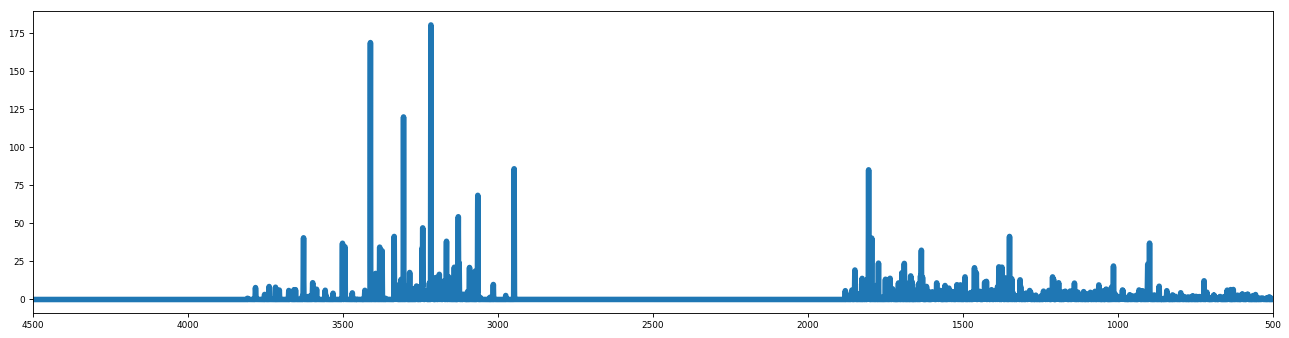

In [20]:
data = IR.get_spectrum(start=500,end=4500,width=1)
fig=plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')

#print(data[0].size)

#broad_y = np.zeros([data[0].size],dtype=np.float32)

#width=30

#for b,w in zip(data[0],data[1]):
#    broad_y += w*np.exp(-(b-data[0])**2./(2*width**2.))/(np.sqrt(2.*np.pi)*width)

plt.plot(data[0],data[1],linewidth=5)
plt.xlim(4500, 500)
plt.show()

In [16]:
data = [IR.get_frequencies(method='standard', direction='central').real, IR.intensities]
np.save(molecule.rsplit(".",1)[0]+'_ANI-HIPNN.npy',data)

In [17]:
# remove mode pckl files
IR.clean()

1873